In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle

from sklearn.model_selection import train_test_split

In [17]:
os.chdir('F:\\Projects\\learn\\deep learning\\convnet')

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [19]:
os.chdir(r"F:\Projects\learn\deep learning\convnet\Birds_20")
CATEGORIES = [str(i) for i in os.listdir()]

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)



In [5]:
# IMG_INDEX = 4  # change this to look at other images

# imshow(X[IMG_INDEX])
# print(CATEGORIES[y[IMG_INDEX]])

In [6]:
#X_test[4]

In [6]:
len(X)

3003

In [20]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.1, random_state=None)

In [9]:
len(y_test)
print(type(X_test))

<class 'numpy.ndarray'>


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)         

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(285))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)         

In [14]:
type(X_test)

numpy.ndarray

In [25]:
y_train = np.array(y_train)
y_test = np.array(y_test)
# X = tf.stack(X)
# type(X_train)
# X_train = tf.stack(X_train)
# X_test = tf.stack(X_test)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
939/939 [==============================] - 42s 44ms/step - loss: 2.0156 - accuracy: 0.3930 - val_loss: 1.5030 - val_accuracy: 0.5070
Epoch 2/15
939/939 [==============================] - 41s 44ms/step - loss: 1.3129 - accuracy: 0.5888 - val_loss: 1.2036 - val_accuracy: 0.6217
Epoch 3/15
939/939 [==============================] - 41s 44ms/step - loss: 1.0344 - accuracy: 0.6759 - val_loss: 0.9243 - val_accuracy: 0.7146
Epoch 4/15
939/939 [==============================] - 42s 44ms/step - loss: 0.8511 - accuracy: 0.7338 - val_loss: 0.8571 - val_accuracy: 0.7320
Epoch 5/15
939/939 [==============================] - 42s 44ms/step - loss: 0.6896 - accuracy: 0.7849 - val_loss: 0.8587 - val_accuracy: 0.7496
Epoch 6/15
939/939 [==============================] - 41s 44ms/step - loss: 0.5990 - accuracy: 0.8114 - val_loss: 0.9500 - val_accuracy: 0.7203
Epoch 7/15
939/939 [==============================] - 41s 44ms/step - loss: 0.5175 - accuracy: 0.8378 - val_loss: 0.8809 - val_accuracy:

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

105/105 - 1s - loss: 1.0953 - accuracy: 0.7616
0.7616052627563477


105/105 - 1s - loss: 1.0953 - accuracy: 0.7616


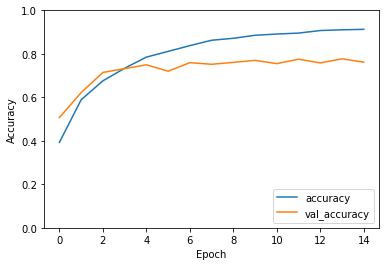

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)